### The source code can be found at https://github.com/leifuzhang/stochastic-foundations-for-finance.
# Question 1
## 1a
Note that the probability mass function (pmf) of a binomial distribution is
$$\Pr\{X = k\} = {n \choose k}p^k(1-p)^{n-k},$$
where $n\geq 1$ and $1>p>0$ are shape parameters. 

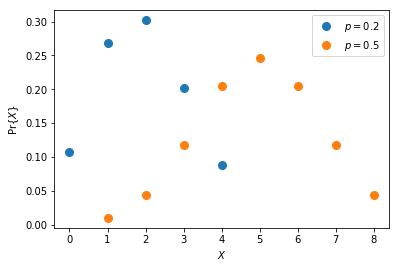

In [2]:
"""
We plot the pmfs of the two binomial distributions in Python
"""

from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 10 
p = [0.2,0.5]

fig1a, ax1a = plt.subplots()
for prob in p:
    x1a = np.arange(binom.ppf(0.01, n, prob), binom.ppf(0.99, n, prob))
    current_label = f'$p = {prob:.2}$'
    ax1a.plot(x1a, binom.pmf(x1a, n, prob),'o', ms=8, label=current_label)
ax1a.set(xlabel='$X$', ylabel='$\Pr\{X\}$')
ax1a.legend()
plt.show()

We can see that for the distribution in which $p=0.5$, it has larger mean and variance but smaller skewness and kurtosis. Because for $X\sim B(n,p)$,
$$
\begin{align*}
\mathbb{E}(X)&=np,\\ 
\mbox{Var}(X)&=np(1-p),\\
\mbox{Skew}(X) &= \frac{1-2p}{\sqrt{np(1-p)}},\\
\mbox{Kurt}(X) &= \frac{1 - 6p(1-p)}{np(1-p)}.
\end{align*}
$$
Since we fix $n=10$, $\mathbb{E}[X]$ is an increasing function of $p$ and $p(1-p)$ is maximized at $p=0.5$.

## 2a
Note that for a Brownian motion $B_t$, $\forall (t,dt) \in \mathbb{R}_+^2$,
$$
\begin{align*}
B_0 &= 0,\\
B_{t+dt} - B_t &= \sqrt{dt}Z,
\end{align*}
$$
where $Z \sim \mathcal{N}(0,1)$ and is independent of $B_t$.

Hence, to simulate a realization of $B_t$ on $[0,1]$, we first generate $n$ i.i.d. random variables $Z_1,...,Z_{n}$, where $Z_i \sim \mathcal{N}(0,1)$ for any $i\in\{1,...,n\}$. Then we let
$$
\begin{align*}
dt &= 1/n,\\
B_{kdt} &= \sqrt{dt}\sum_{i=1}^k Z_i, \forall k\in\{1,...,n\}.
\end{align*}
$$

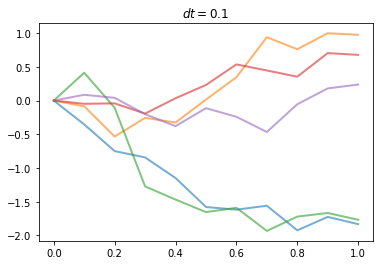

In [3]:
"""
We implement this idea in Python
"""


# The following function will give a sample path with n sample points of a Brownian motion on [0,1]

def brownian_motion(n):
    dt = 1/n
    sqr_dt = np.sqrt(dt)
    z = np.random.normal(size = n)
    B=[0]
    temp = 0
    
    for i in range(n):
        temp += z[i]
        B.append(sqr_dt*temp)
    
    return B

# The number of simulations
path_num = 5

# Set dt = 0.1
points_num = 10

# Draw 5 sample paths for dt = 0.1
fig1b, ax1b = plt.subplots()
for i in range(path_num):
    x1b = np.linspace(0,1,points_num+1)
    y = brownian_motion(points_num)
    ax1b.plot(x1b,y, linewidth=2, alpha=0.6)
ax1b.set_title(f'$dt = {1/points_num:.2}$')
plt.show()

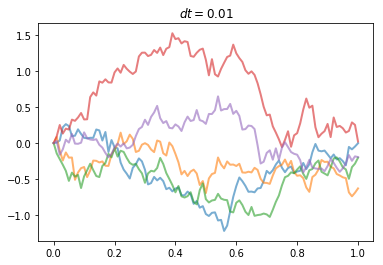

In [4]:
# Set dt = 0.01
points_num = 100

# Draw 5 sample paths for dt = 0.01
fig1b, ax1b = plt.subplots()
for i in range(path_num):
    x1b = np.linspace(0,1,points_num+1)
    y = brownian_motion(points_num)
    ax1b.plot(x1b,y, linewidth=2, alpha=0.6)
ax1b.set_title(f'$dt = {1/points_num:.2}$')
plt.show()

# Question 2
We need two facts first.
> __Fact 1.__ Any affine transformation preserves normality. That is, $\mathbf{Y} = \mathbf{A}\mathbf{X}$ is also a multivariate Gaussian random vector.

>__Fact 2.__ For any random vector $\mathbf{X} \in \mathbb{R}^n$ and any $m\times n$ matrix $\mathbf{A}$, we have
$$
\begin{align*}
\mathbb{E}[\mathbf{A}\mathbf{X}] &= \mathbf{A}\mathbb{E}[\mathbf{X}],\\
\mbox{Cov}(\mathbf{A}\mathbf{X}) &= \mathbf{A}\mbox{Cov}(\mathbf{X})\mathbf{A}'.
\end{align*}
$$

Hence,
$$\mathbf{Y} = \mathcal{N}(\mathbf{A}\mathbf{\mu}_\mathbf{X}, \mathbf{A}\mathbf{\Sigma}_{\mathbf{X}}\mathbf{A}').$$


# Question 3
From page 7 of lecture notes 1,
$$
\begin{align*}
\mathbb{E}[X^2] &= \mu^2 + \sigma^2,\\
\mathbb{E}[X^3] &= \mu^3 + 3\mu\sigma^2,\\
\mathbb{E}[X^4] &= \mu^4 + 6\mu^2\sigma^2 + 3\sigma^4.
\end{align*}
$$
Note that
$$
\begin{align*}
\mbox{Var}(X^2) &= \mathbb{E}[X^4] - (\mathbb{E}[X^2])^2\\
&= \mu^4 + 6\mu^2\sigma^2 + 3\sigma^4 - (\mu^2 + \sigma^2)^2\\
&= 4\mu^2\sigma^2 + 2\sigma^4.
\end{align*}
$$

# Question 4
Since $B_t \sim \mathcal{N}(0,t)$,
$$
\begin{align*}
\mathbb{E}[X_t] &= \int_{-\infty}^\infty e^{\mu t + \sigma x} \frac{1}{\sqrt{2\pi t}}e^{-\frac{x^2}{2t}}dx\\
&= e^{\mu t + t\sigma^2/2},\\
\mathbb{E}[X_t^2] &= \int_{-\infty}^\infty (e^{\mu t + \sigma x})^2 \frac{1}{\sqrt{2\pi t}}e^{-\frac{x^2}{2t}}dx\\
&= e^{2\mu t + 2t\sigma^2},\\
\mbox{Var}(X_t) &= \mathbb{E}[X_t^2] - (\mathbb{E}[X_t])^2\\
&=(e^{t\sigma^2} -1)e^{2\mu t + t\sigma^2}.
\end{align*}
$$
For any $0<s<t$, 
$$
\begin{align*}
\mathbb{E}_s[X_t] &= \mathbb{E}_s[e^{\mu t + \sigma(B_t - B_s) + \sigma B_s}]\\
&= e^{\mu t + (t-s)\sigma^2/2 + \sigma B_s},\\
\mathbb{E}_s[X_t^2] &= \mathbb{E}_s[e^{2\mu t + 2\sigma(B_t - B_s) + 2\sigma B_s}] \\
&=e^{2\mu t + 2(t-s)\sigma^2 + 2\sigma B_s},\\
\mbox{Var}_s(X_t) &= \mathbb{E}_s[X_t^2] - (\mathbb{E}_s[X_t])^2\\
&= e^{2\mu t + (t-s)\sigma^2 + 2\sigma B_s}[e^{(t-s)\sigma^2}-1].
\end{align*}
$$

# Question 5
No. If it is true, then by the definition of Brownian motion, _at least_ we have
$$\mbox{Var}(A_t B_t) = t, \forall t\geq 0.$$
However,
$$
\begin{align*}
\mbox{Var}(A_t B_t) &= \mathbb{E}[A_t^2 B_t^2] - (\mathbb{E}[A_t])^2(\mathbb{E}[B_t])^2\\
&= t^2.
\end{align*}
$$
> __Claim 1.__ $\frac{B_t}{t} \xrightarrow{L^2} 0.$

Note that 
$$
\begin{align*}
\lim_{t\rightarrow \infty} \mathbb{E}\left[\left|\frac{B_t}{t} - 0\right|^2\right] &=\lim_{t\rightarrow \infty}\frac{1}{t^2} \mathbb{E}[B_t^2]\\
&=\lim_{t\rightarrow \infty}\frac{1}{t}\\
&=0.
\end{align*}
$$

> __Claim 2.__ $\frac{A_t B_t}{t} = ZW = \frac{1}{2}(X-Y)$, where
- $Z$ and $W$ are two independent random variables which follow the standard normal distribution;
- $X$ and $Y$ are two independent random variables which follow the $\chi^2$-distribution with 1 degree of freedom.

$\frac{A_t B_t}{t} = \frac{A_t}{\sqrt{t}} \frac{B_t}{\sqrt{t}} = ZW$, since $A_t\sim \mathcal{N}(0,t)$ and $B_t \sim \mathcal{N}(0,t)$ are two i.i.d. r.v.s. Note that $ZW$ is independent of $t$, so in this case $\lim_{t\rightarrow \infty}\frac{A_t B_t}{t} = \frac{A_t B_t}{t} = ZW$, which is a special case of the so-called Normal Product Distribution. See http://mathworld.wolfram.com/NormalProductDistribution.html.

Further note that $ZW = \frac{1}{4}[(Z + W)^2 - (Z - W)^2]$. Since $Z$ and $W$ are two independent random variables which follow the standard normal distribution,
$$
\begin{align*}
X:= \left[\frac{1}{\sqrt{2}}(Z + W)\right]^2 \sim \chi^2(1),\\
Y:= \left[\frac{1}{\sqrt{2}}(Z - W)\right]^2 \sim \chi^2(1).
\end{align*}
$$
Hence, $ZW = \frac{1}{2}(X-Y)$. $X$ and $Y$ are independent because
$\mbox{Cov}(Z + W, Z-W) = 0$. Note that $X-Y$ follows the so-called variance-gamma distribution with $\lambda = \alpha = 1/2, \beta = \mu = 0$. See https://reference.wolfram.com/language/ref/VarianceGammaDistribution.html.

# Question 6
No. Because $\sqrt{t}B_t \sim \mathcal{N}(0,t^2)$.

$D$ is a Gaussian random variable.
$$
\begin{align*}
\mbox{Cov}(D,B_t) &= \mathbb{E}\left[B_t B_{\frac{t+s}{2}} - \frac{1}{2}(B_t^2 + B_t B_s)\right]\\
&= \mathbb{E}\left[\left(B_t - B_{\frac{t+s}{2}} +B_{\frac{t+s}{2}}\right) B_{\frac{t+s}{2}} - \frac{1}{2}[B_t^2 + (B_t-B_s+B_s) B_s]\right]\\
&= \frac{t+s}{2} - \frac{t+s}{2}\\
&=0,\\
\mbox{Cov}(D,B_s) &= \mathbb{E}\left[B_s B_{\frac{t+s}{2}} - \frac{1}{2}(B_s^2 + B_t B_s)\right]\\
&= \mathbb{E}\left[\left(B_{\frac{t+s}{2}} - B_s +B_s\right) B_s - \frac{1}{2}[B_s^2 + (B_t-B_s+B_s) B_s]\right]\\
&=s-s\\
&=0.
\end{align*}
$$
Hence, $D$ is independent of $B_t$ and $B_s$.

# Question 7
The miner has 5 possible paths:
- $1$ with probability $1/3$, which needs $3$ hours;
- $2\rightarrow 1$ with probability $1/6$, which needs $8$ hours;
- $2\rightarrow 3 \rightarrow 1$ with probability $1/6$, which needs $15$ hours;
- $3\rightarrow 1$ with probability $1/6$, which needs $10$ hours;
- $3\rightarrow 2 \rightarrow 1$ with probability $1/6$, which needs $15$ hours.

Hence, the expected length of time until he reaches safety is
$$
\frac{1}{3}\times 3 + \frac{1}{6}\times(8+15+10+15) = 9 \mbox{ (hours)}.
$$

# Question 8
$$
\begin{align*}
\Pr\{\mbox{accident}\} &= \Pr\{\mbox{accident }|\mbox{ accident prone}\}\Pr\{\mbox{accident prone}\} + \Pr\{\mbox{accident }|\mbox{ not accident prone}\}\Pr\{\mbox{not accident prone}\}\\
&= 0.4\times 0.3 + 0.2\times 0.7\\
&=0.26.
\end{align*}
$$

# Question 9
Two facts you should know:
- the law of iterated expectations;
- the linearity of $\mathbb{E}$.
$$
\begin{align*}
\mbox{Var}(X|Y) &:= \mathbb{E}[(X-\mathbb{E}[X|Y])^2|Y]\\
&= \mathbb{E}[X^2 - 2X\mathbb{E}[X|Y]+(\mathbb{E}[X|Y])^2|Y]\\
&= \mathbb{E}[X^2|Y]- 2\mathbb{E}[X|Y]\mathbb{E}[X|Y] + (\mathbb{E}[X|Y])^2\\
&= \mathbb{E}[X^2|Y]- (\mathbb{E}[X|Y])^2,\\
\mbox{Var}(X) &= \mathbb{E}[X^2]- (\mathbb{E}[X])^2\\
&= \mathbb{E}[\mathbb{E}[X^2|Y]] - (\mathbb{E}[\mathbb{E}[X|Y]])^2\\
&= \mathbb{E}[\mathbb{E}[X^2|Y]- (\mathbb{E}[X|Y])^2] + \mathbb{E}[(\mathbb{E}[X|Y])^2] -  (\mathbb{E}[\mathbb{E}[X|Y]])^2\\
&= \mathbb{E}[\mbox{Var}(X|Y)] + \mbox{Var}(\mathbb{E}[X|Y]).
\end{align*}
$$

# Question 10
## 10a
Obviously, $(X_t,t\geq 0)$ is adapted to the natural filtration generated by $(B_t,t\geq 0)$. Also note that for any $t\geq 0$,
$$\mathbb{E}[|X_t|] =  \mathbb{E}[|B_t^2 - t|] \leq \mathbb{E}[B_t^2 + t]=2 t < \infty.$$
In addition, for any $0\leq s < t$,
$$
\begin{align*}
\mathbb{E}_s[X_t] &= \mathbb{E}_s[(B_t - B_s)^2 - t]\\
&= \mathbb{E}[(B_t-B_s)^2 + 2(B_t - B_s)B_s + B_s^2 - t]\\
&= (t-s) + 0 + B_s^2 - t\\
&= B_s^2 - s\\
&= X_s.
\end{align*}
$$
Hence, $X_t$ is a martingale w.r.t. the natural filtration generated by $(B_t,t\geq 0)$.

## 10b
We can use the function in 2a to simulate $X_t$.

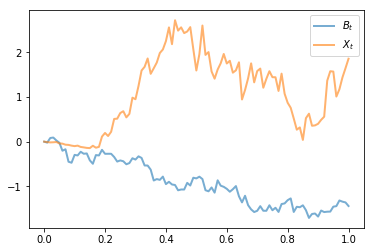

In [5]:
# This is a function to generate a sample path of Xt on [0,1]

def x_motion(n):
    time = np.linspace(0,1,n+1)
    bt = brownian_motion(n)
    return [xt**2 for xt in bt]- time


# Set n = 100
points_num = 100

# One realization of B_t (X_t) on [0,1]
fig10b, ax10b = plt.subplots()
x10b = np.linspace(0,1,points_num+1)
y1 = brownian_motion(points_num)
y2 = x_motion(points_num)
ax10b.plot(x10b,y1,linewidth=2, alpha=0.6, label='$B_t$')
ax10b.plot(x10b,y2,linewidth=2, alpha=0.6, label='$X_t$')
ax10b.legend()
plt.show()

Note that $B_t \sim \mathcal{N}(0,t)$ and
$$B_s = (B_s - B_t) + B_t = B_t + \sqrt{s-t}Z,$$
where $Z \sim \mathcal{N}(0,1)$. Hence, to generate $n$ simulations of $X_s$ conditional on the information set at $t$, we only need to generate $n$ i.i.d. r.v. which follow the standard normal distribution.

In [6]:
# I choose t= 0.5, s = 0.9.
t = 0.5
s = 0.9

# The number of simulations
simulation_num = 10000

# One realization of B_t
bt = np.sqrt(t)*np.random.normal()

# One realization of X_t
xt = bt**2 - t

# n simulations of B_s conditional on B_t
bslist = np.sqrt(s-t)*np.random.normal(size=simulation_num) + bt

# n simulations of X_s conditional on X_t
xslist = [bs**2-s for bs in bslist]

# The estimated E_t[X_s]
xshat = sum(xslist)/len(xslist)

print(f'X_t = {xt:.4}')
print(f'E_t[X_s]={xshat:.4}')
print(f'The difference is {xt-xshat:.4}')

X_t = -0.2051
E_t[X_s]=-0.2132
The difference is 0.008122
